In [1]:
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

In [2]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

## Reading historial data ( using adjusted close data ) 

In [3]:
ls_symbols = ['AAPL', 'GLD', 'GOOG', '$SPX', 'XOM']
dt_start = dt.datetime(2006, 1, 1)
dt_end = dt.datetime(2010, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

In [4]:
c_dataobj = da.DataAccess('Yahoo') # Creates object of Yahoo data 
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close'] # Data types we want
ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

## First Figure
Create a figure showing the adjusted close data from the file

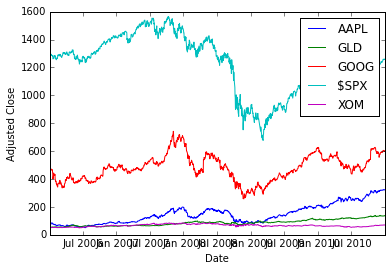

In [5]:
na_price = d_data['close'].values
plt.clf()
plt.rcParams['figure.figsize'] = (100.0, 8.0)  # Adjusts the size of the figure 
plt.plot(ldt_timestamps, na_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.savefig('adjustedclose.pdf', format='pdf')


## Normalized Data
A problem with the previous figure is that the high share price of GOOG dominates. It is difficult to see what's going on with the other equities. Also, as an investor, you really want to see relative, or normalized price moves. Here's how to normalize the data:


In [6]:
na_normalized_price = na_price / na_price[0, :]

## Daily Returns
It is very often useful to look at the returns by day for individual stocks. The general equation for daily return on day t is:
ret(t) = (price(t)/price(t-1)) -1
We can compute this in Python all at once as using the builtin QSTK function returnize0:

In [7]:
# Copy the normalized prices to a new ndarry to find returns.
na_rets = na_normalized_price.copy()

# Calculate the daily returns of the prices. (Inplace calculation)
# returnize0 works on ndarray and not dataframes.
tsu.returnize0(na_rets)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       ..., 
       [  2.44362647e-03,   1.62938824e-02,  -5.74388260e-03,
          7.71347233e-04,   5.57222460e-03],
       [ -5.55418415e-04,   3.57090803e-03,   3.47291792e-03,
          1.00912984e-03,  -5.68343279e-04],
       [ -5.00154369e-03,  -4.93791301e-03,  -3.56073211e-03,
         -1.50819984e-03,  -1.42166619e-04]])

In [8]:
# Plotting the plot of daily returns

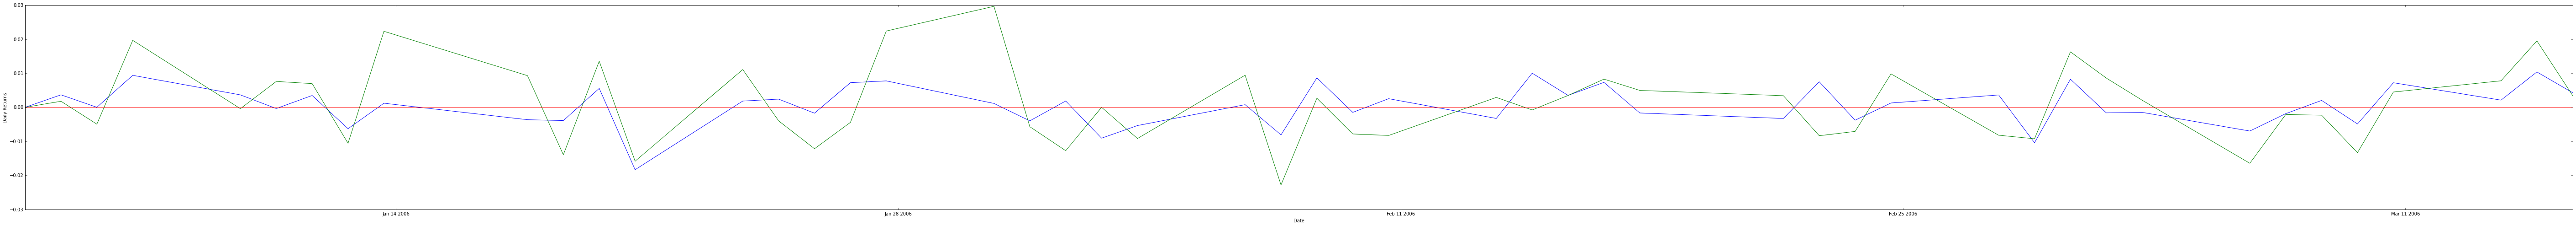

In [9]:
plt.clf()
plt.plot(ldt_timestamps[0:50], na_rets[0:50, 3])  # $SPX 50 days
plt.plot(ldt_timestamps[0:50], na_rets[0:50, 4])  # XOM 50 days
plt.axhline(y=0, color='r')
plt.ylabel('Daily Returns')
plt.xlabel('Date')

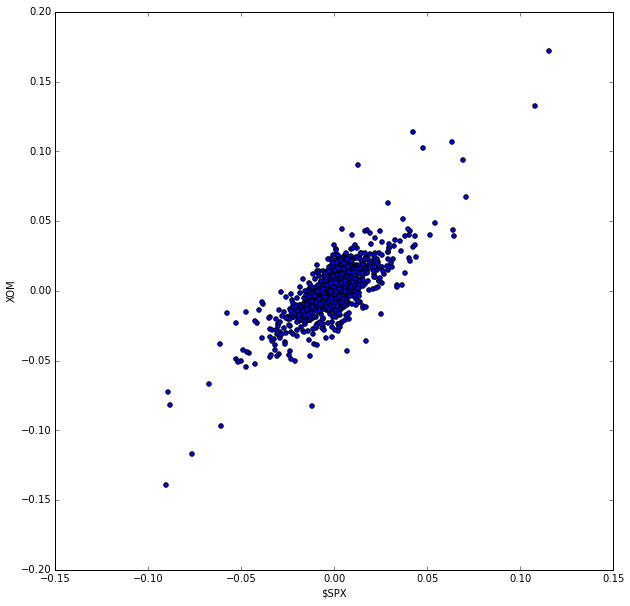

In [35]:
    # Plotting the scatter plot of daily returns between XOM VS $SPX
    plt.clf()
    plt.scatter(na_rets[:, 3], na_rets[:, 4], c='blue')
    plt.ylabel('XOM')
    plt.xlabel('$SPX')

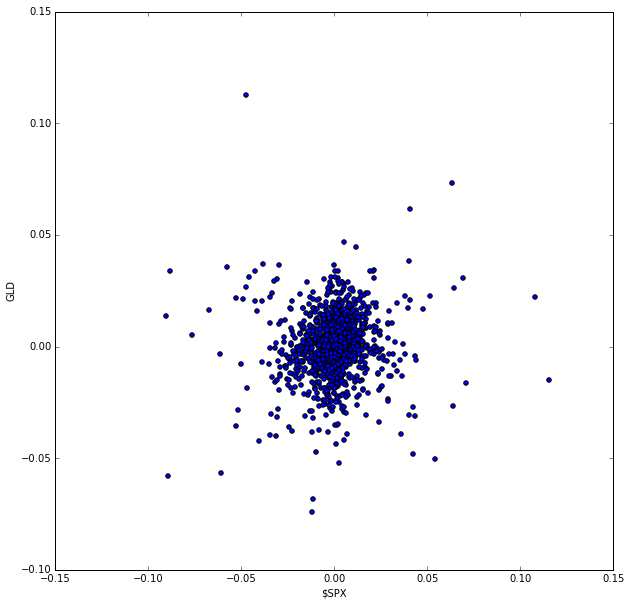

In [36]:
    # Plotting the scatter plot of daily returns between $SPX VS GLD
    plt.clf()
    plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')  # $SPX v GLD
    plt.ylabel('GLD')
    plt.xlabel('$SPX')

## Exercise: Cumulative Daily Returns
Using the daily returns we can reconstruct cumulative daily returns. Note that in general the cumulative daily return for day t is defined as follows (this is NOT Python code, it is an equation):  daily_cum_ret(t) = daily_cum_ret(t-1) * (1 + daily_ret(t))


In [38]:
for i in na_price:
    daily_cum_ret(0) = 0
    daily_cum_ret(i) = daily_cum_ret(i-1) * (1 + daily_ret(i))

SyntaxError: can't assign to function call (<ipython-input-38-a7839b489d46>, line 2)

In [40]:
na_rets

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       ..., 
       [  2.44362647e-03,   1.62938824e-02,  -5.74388260e-03,
          7.71347233e-04,   5.57222460e-03],
       [ -5.55418415e-04,   3.57090803e-03,   3.47291792e-03,
          1.00912984e-03,  -5.68343279e-04],
       [ -5.00154369e-03,  -4.93791301e-03,  -3.56073211e-03,
         -1.50819984e-03,  -1.42166619e-04]])